# Problem Statement

The dataset consists of monthly totals of international airline passengers from 1995 to 2002. Our main aim is to predict the number of passengers for the next five years using time series forecasting. Prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

Lets load our data and important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (10,12)
plt.style.use('ggplot')

In [3]:
data = pd.read_excel('Airlines Data.xlsx')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
data.shape

(96, 2)

We have 96 rows and 2 columns, lets explore our dataset

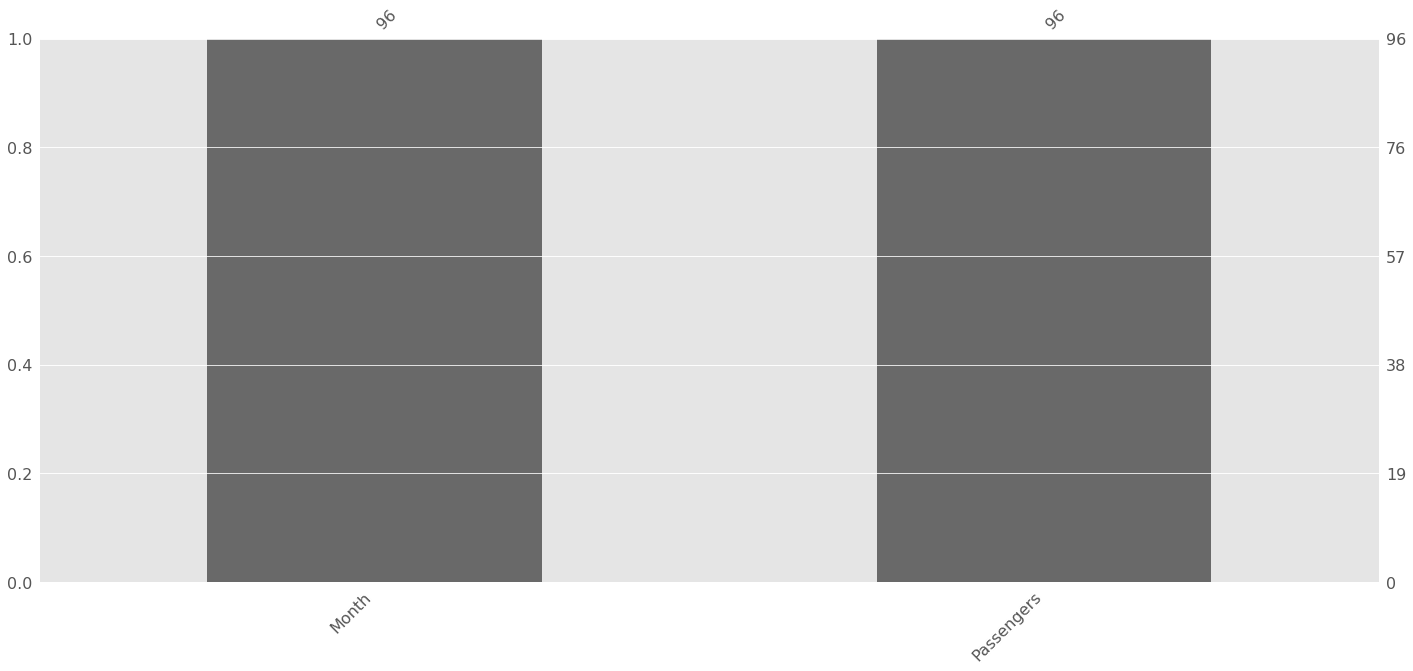

In [6]:
msno.bar(data)

We do not have any missing value in our dataset

Lets convert our data for data exploration

In [7]:
backup = data.copy()

In [8]:
# converting the dates column into proper date time format

dates = pd.date_range(start='1995-01-01',freq='MS',periods=len(data))
dates

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [9]:
data['Month'] = dates.month
data['Year'] = dates.year

In [10]:
data.head()

,Month,Passengers,Year
0,1,112,1995
1,2,118,1995
2,3,132,1995
3,4,129,1995
4,5,121,1995


In [11]:
# Lets get the names of our months

import calendar
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data = data[['Month','Year','Passengers']]
data.head()

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121


In [12]:
# lets add the dates into our dataset

data['Dates'] = dates
data.set_index('Dates', inplace=True)
data.head()

<ipython-input-12-5e9a2d7c8bb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dates'] = dates


,Month,Year,Passengers
Dates,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121


In [13]:
# Lets visualize our dataset

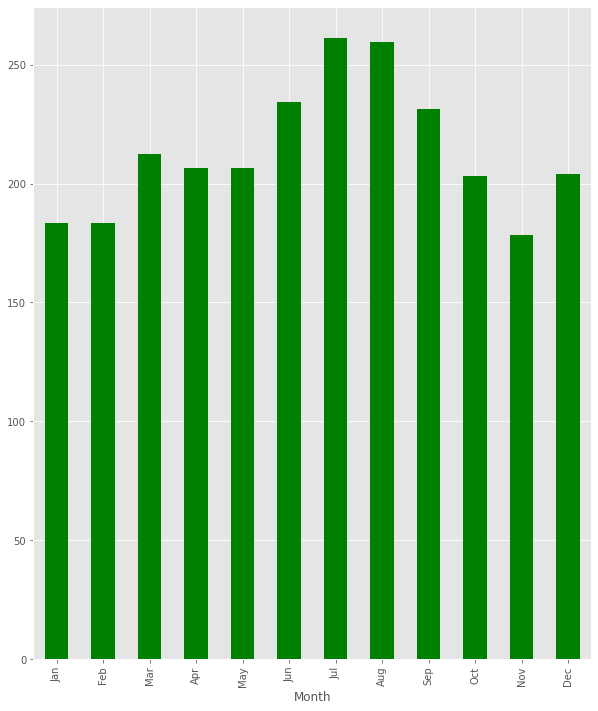

In [30]:
data.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar',color='green')

Peak season is between Jun to Sep, we see less passengers in Jan, Feb and Nov

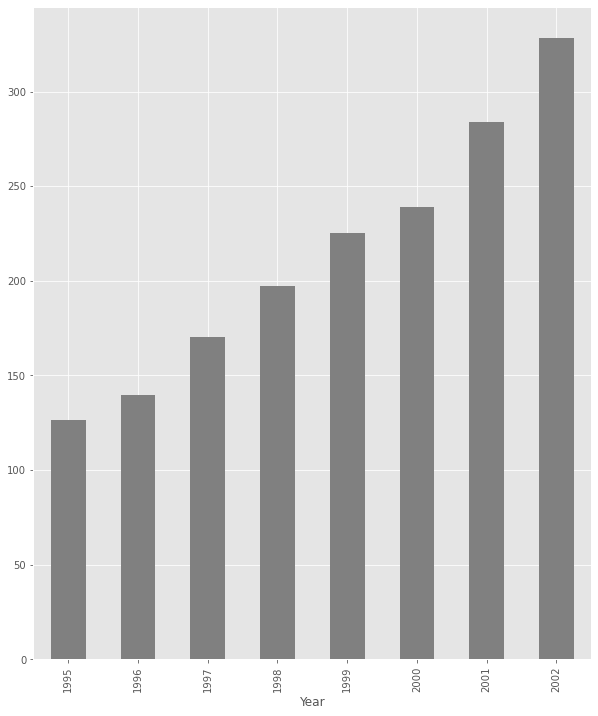

In [31]:
data.groupby('Year')['Passengers'].mean().plot(kind='bar',color='grey')

We can see the number of passengers count has increased YoY 

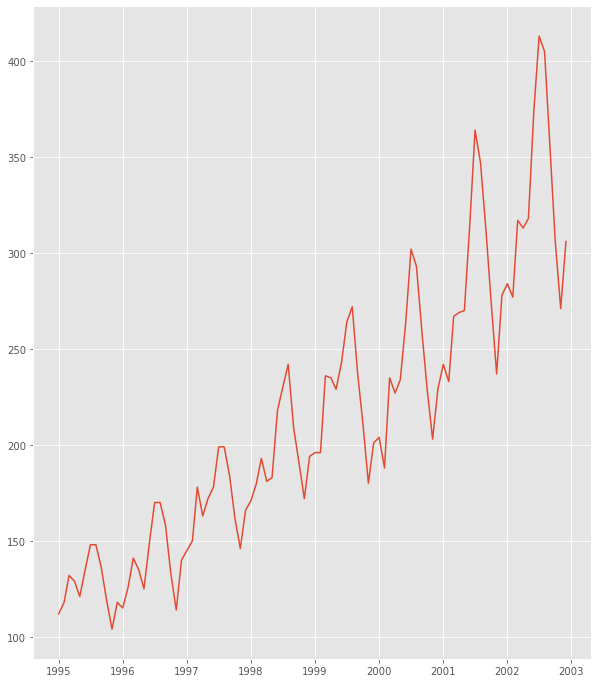

In [33]:
plt.plot(data['Passengers'])

In [32]:
# Lets plot the decomposition chart

passengers_count = data['Passengers']
passengers_count

Dates
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

Text(0.5, 0.98, 'Decomposition Chart of Airline Data')

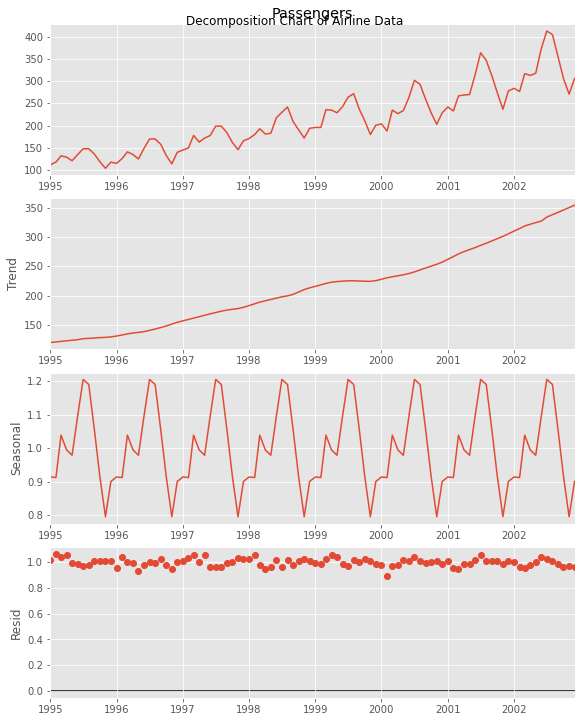

In [34]:
decompose = sm.tsa.seasonal_decompose(passengers_count, model = 'multiplicative', extrapolate_trend=8)

fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition Chart of Airline Data')

In [35]:
# lets plot charts with moving averages

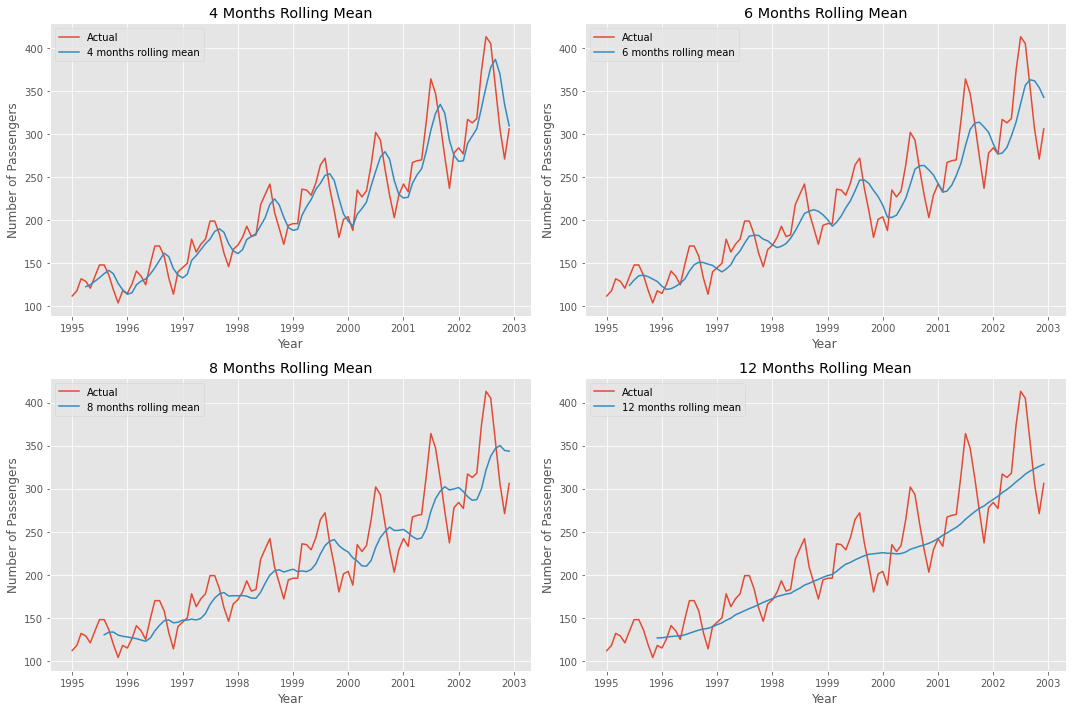

In [36]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(data.index,passengers_count,label='Actual')
axes[0][0].plot(data.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(data.index,passengers_count,label='Actual')
axes[0][1].plot(data.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(data.index,passengers_count,label='Actual')
axes[1][0].plot(data.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(data.index,passengers_count,label='Actual')
axes[1][1].plot(data.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [37]:
# Lets look at the seasonality of the data

In [38]:
monthly = pd.pivot_table(data=data,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


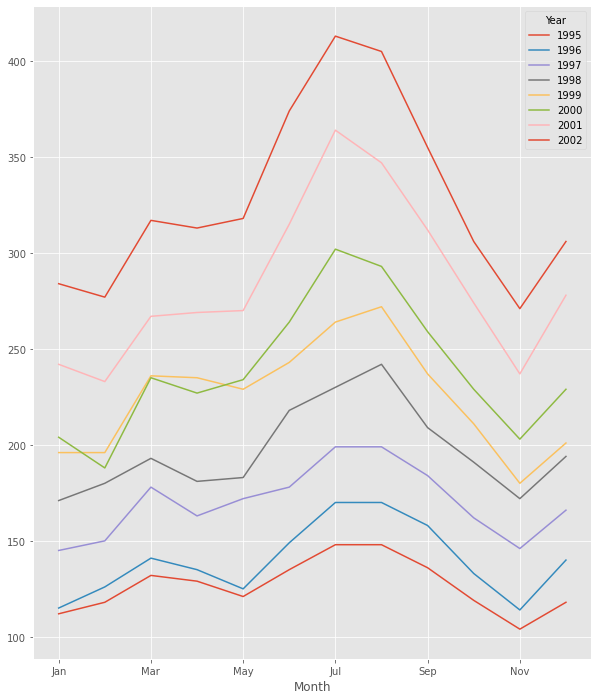

In [39]:
monthly.plot()

In [40]:
yearly = pd.pivot_table(data=data,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


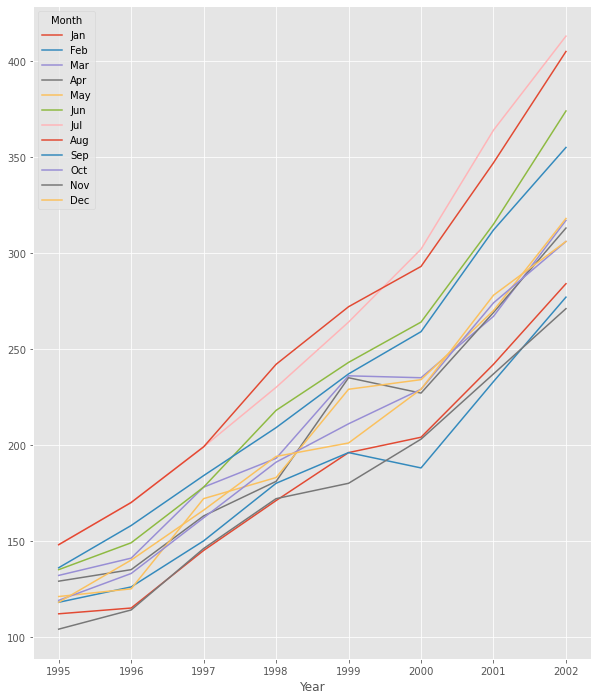

In [41]:
yearly.plot()

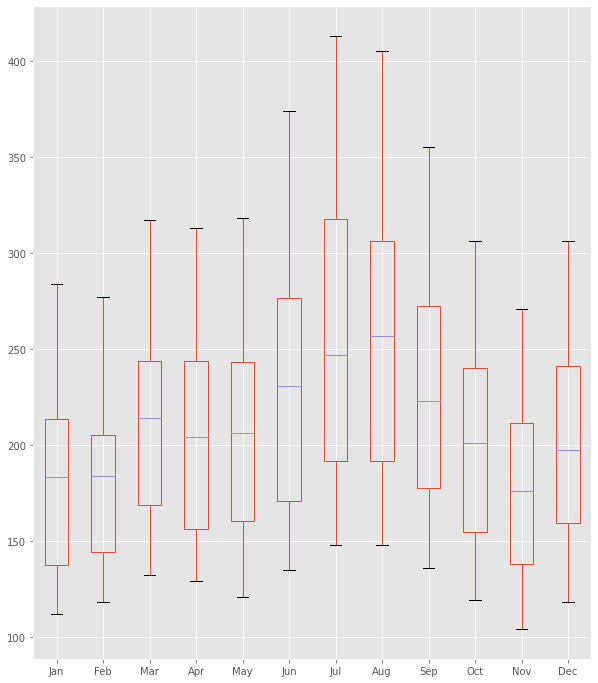

In [42]:
yearly.plot(kind='box')

Lets build ARIMA model

In [43]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [44]:
airlines = backup.copy()
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [45]:
train = airlines.head(84)
test = airlines.tail(12)
print(train.shape, test.shape)

(84, 2) (12, 2)


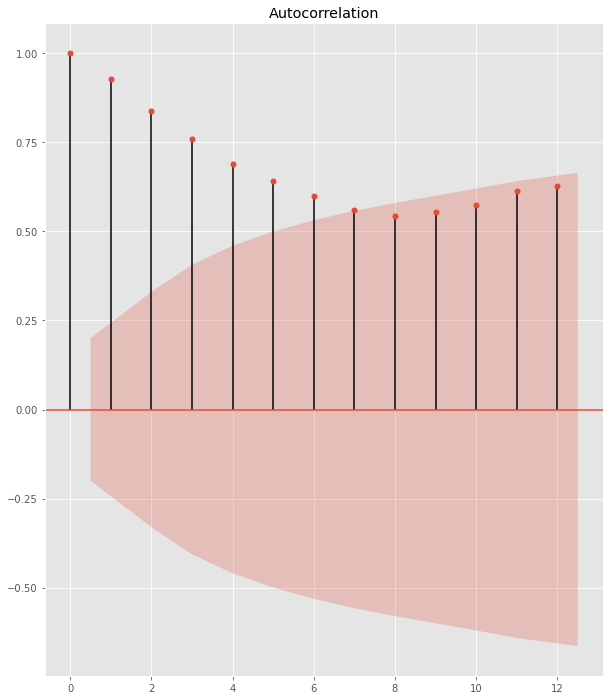

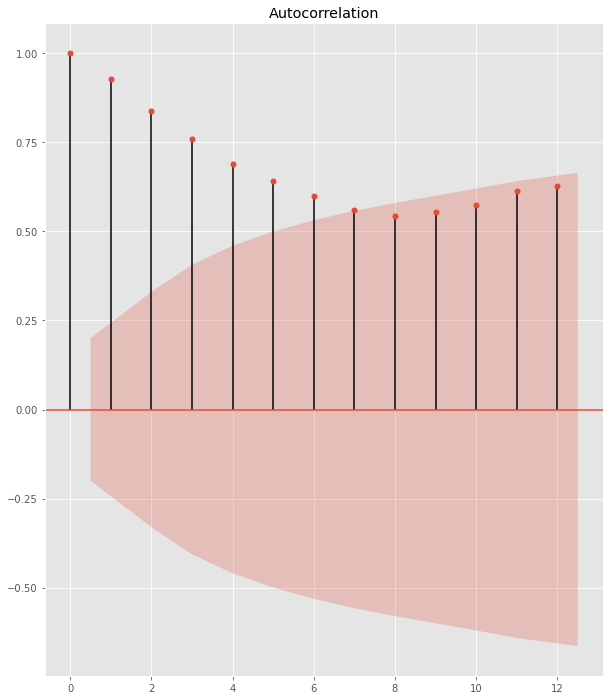

In [48]:
tsa_plots.plot_acf(airlines.Passengers,lags = 12)

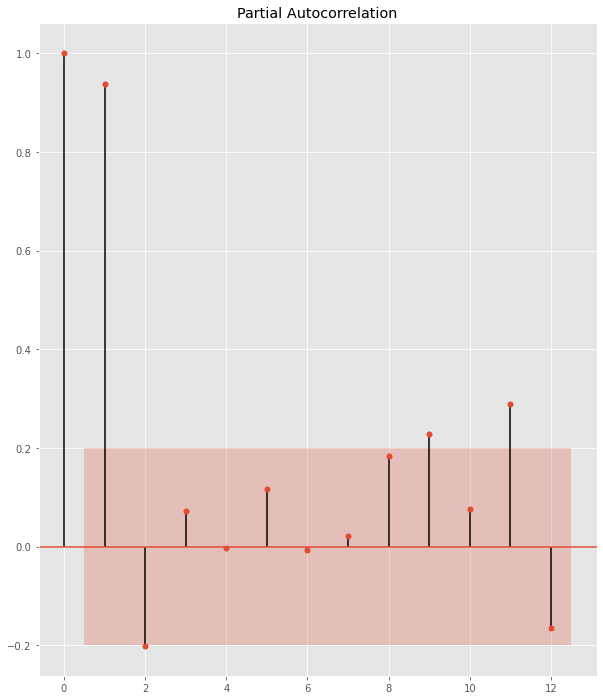

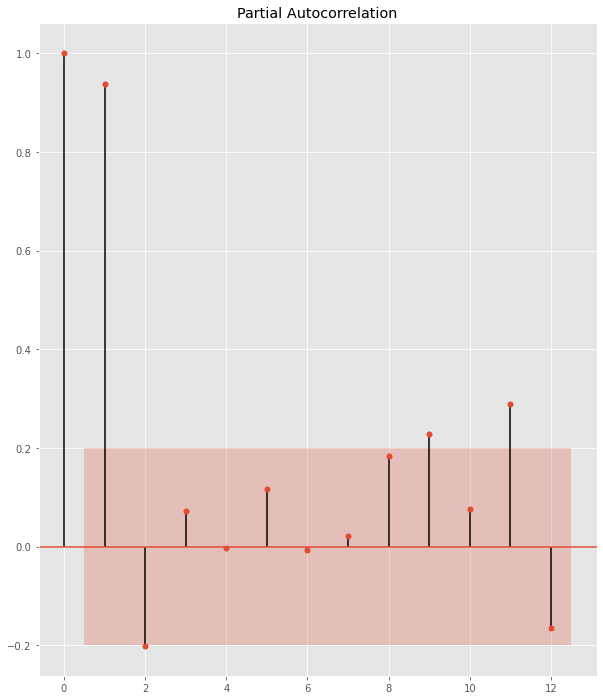

In [49]:
tsa_plots.plot_pacf(airlines.Passengers,lags=12)

In [50]:
# Auto ARIMA will automatically discover the optimal order for an ARIMA model

import pmdarima as pm

In [51]:
ar_model = pm.auto_arima(train.Passengers, start_p=0,start_q=0,
                        max_p=12, max_q=12,
                        m=1,
                        d=None,
                        seasonal=False,
                        start_P=0,trace=True,
                        error_action='warn',stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=747.147, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=745.646, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=743.815, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=745.877, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=742.645, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=743.308, Time=0.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=741.311, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=742.357, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=744.193, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=736.326, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=742.125, Time=0.07 se

In [52]:
# BEST parameters = ARIMA(2,1,1)(0,0,0)[0]
model = ARIMA(train.Passengers, order=(2,1,1))
res=model.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   84
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -364.163
Date:                Mon, 10 Jan 2022   AIC                            736.326
Time:                        16:07:34   BIC                            746.001
Sample:                             0   HQIC                           740.213
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9705      0.119      8.163      0.000       0.737       1.204
ar.L2         -0.4016      0.151     -2.666      0.008      -0.697      -0.106
ma.L1         -0.8031      0.126     -6.394      0.0

In [53]:
# Forecast for next 12 months

start_index = len(train)
end_index = start_index + 11
forecast_best = res.predict(start=start_index,end=end_index)
print(forecast_best)

84    300.276995
85    305.431755
86    301.488389
87    295.591358
88    291.451942
89    289.802821
90    289.864678
91    290.586962
92    291.263089
93    291.629207
94    291.713000
95    291.647295
dtype: float64


In [54]:
# Evaluate Forecast

rmse_best = sqrt(mean_squared_error(test.Passengers, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 59.559


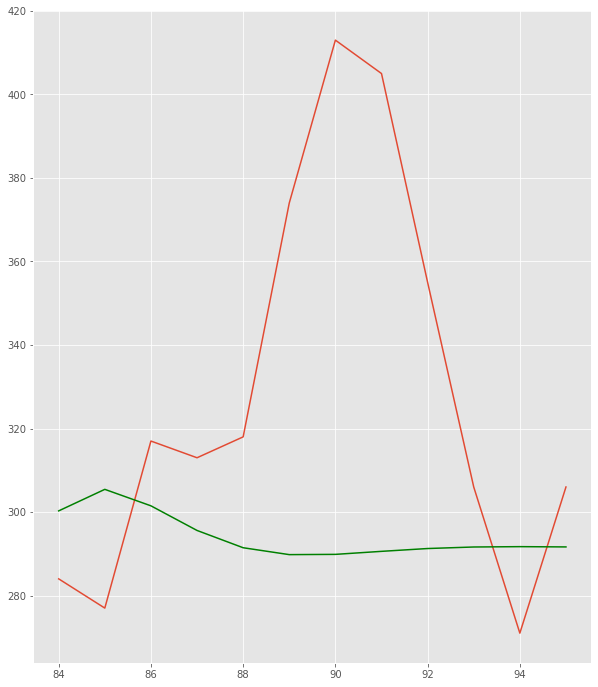

In [58]:
# plot forecasts against actual outcomes
plt.plot(test.Passengers)
plt.plot(forecast_best, color='green')
plt.show()

### Forecasting using Data Driven Approach

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [60]:
# Creating a function to calculate MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Simple Exponential Method

In [63]:
ses_model = SimpleExpSmoothing(train['Passengers']).fit()
pred_ses = ses_model.predict(start=test.index[0], end = test.index[-1])
pred_ses
MAPE(pred_ses,test.Passengers)

14.235433039401634

#### Holt Method

In [64]:
hw_model = Holt(train['Passengers']).fit()
pred_hw =hw_model.predict(start = test.index[0], end=test.index[-1])
MAPE(pred_hw,test.Passengers)

11.840938010405461

#### Holts winter exponential smoothing with additive seasonality and additive trend


In [67]:

hwe_model_add_add = ExponentialSmoothing(train['Passengers'], seasonal = "add", trend = "add", seasonal_periods = 4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0], end = test.index[-1])
MAPE(pred_hwe_add_add, test.Passengers) 

C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


14.85515803229228

In [68]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [70]:

hwe_model_mul_add = ExponentialSmoothing(train['Passengers'], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0], end = test.index[-1])
MAPE(pred_hwe_mul_add, test.Passengers) 

C:\Users\jaic208\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


15.87116228625149

#### Forecasting using Model Based Approach

In [71]:
# Preprocessing our data

In [75]:
airlines['t'] = np.arange(len(airlines))


In [77]:
airlines['t_squared'] = airlines['t'] * airlines['t']
airlines['log_passengers'] = np.log(airlines['Passengers'])
airlines

,Month,Passengers,t,t_squared,log_passengers
0,1995-01-01,112,0,0,4.718499
1,1995-02-01,118,1,1,4.770685
2,1995-03-01,132,2,4,4.882802
3,1995-04-01,129,3,9,4.859812
4,1995-05-01,121,4,16,4.795791
...,...,...,...,...,...
91,2002-08-01,405,91,8281,6.003887
92,2002-09-01,355,92,8464,5.872118
93,2002-10-01,306,93,8649,5.723585
94,2002-11-01,271,94,8836,5.602119


In [78]:
airlines['month'] = pd.DatetimeIndex(airlines['Month']).month
airlines

,Month,Passengers,t,t_squared,log_passengers,month
0,1995-01-01,112,0,0,4.718499,1
1,1995-02-01,118,1,1,4.770685,2
2,1995-03-01,132,2,4,4.882802,3
3,1995-04-01,129,3,9,4.859812,4
4,1995-05-01,121,4,16,4.795791,5
...,...,...,...,...,...,...
91,2002-08-01,405,91,8281,6.003887,8
92,2002-09-01,355,92,8464,5.872118,9
93,2002-10-01,306,93,8649,5.723585,10
94,2002-11-01,271,94,8836,5.602119,11


In [79]:
month_dummies = pd.DataFrame(pd.get_dummies(airlines['month']))
airlines1 = pd.concat([airlines,month_dummies],axis=1)
airlines1

,Month,Passengers,t,t_squared,log_passengers,month,1,2,3,4,5,6,7,8,9,10,11,12
0,1995-01-01,112,0,0,4.718499,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1,1,4.770685,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,2,4,4.882802,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,3,9,4.859812,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,4,16,4.795791,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,91,8281,6.003887,8,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,92,8464,5.872118,9,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,93,8649,5.723585,10,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,94,8836,5.602119,11,0,0,0,0,0,0,0,0,0,0,1,0


In [80]:
KKK

,Month,Passengers,t,t_squared,log_passengers,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,0,0,4.718499,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1,1,4.770685,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,2,4,4.882802,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,3,9,4.859812,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,4,16,4.795791,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,91,8281,6.003887,8,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,92,8464,5.872118,9,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,93,8649,5.723585,10,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,94,8836,5.602119,11,0,0,0,0,0,0,0,0,0,0,1,0


In [81]:
# Will will split our data into Train and Test sets

In [82]:
train = airlines1.head(84)
test = airlines1.tail(12)
print(train.shape, test.shape)

(84, 18) (12, 18)


#### Linear Model

In [83]:
import statsmodels.formula.api as smf
test.set_index(np.arange(1,13))

,Month,Passengers,t,t_squared,log_passengers,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,2002-01-01,284,84,7056,5.648974,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2002-02-01,277,85,7225,5.624018,2,0,1,0,0,0,0,0,0,0,0,0,0
3,2002-03-01,317,86,7396,5.758902,3,0,0,1,0,0,0,0,0,0,0,0,0
4,2002-04-01,313,87,7569,5.746203,4,0,0,0,1,0,0,0,0,0,0,0,0
5,2002-05-01,318,88,7744,5.762051,5,0,0,0,0,1,0,0,0,0,0,0,0
6,2002-06-01,374,89,7921,5.924256,6,0,0,0,0,0,1,0,0,0,0,0,0
7,2002-07-01,413,90,8100,6.023448,7,0,0,0,0,0,0,1,0,0,0,0,0
8,2002-08-01,405,91,8281,6.003887,8,0,0,0,0,0,0,0,1,0,0,0,0
9,2002-09-01,355,92,8464,5.872118,9,0,0,0,0,0,0,0,0,1,0,0,0
10,2002-10-01,306,93,8649,5.723585,10,0,0,0,0,0,0,0,0,0,1,0,0


In [85]:
linear_model = smf.ols('Passengers ~ t',data = train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480273

#### Exponential Model

In [86]:
exp = smf.ols('log_passengers ~ t', data = train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

46.05736110315623

#### Quadratic Model

In [87]:
quad = smf.ols('Passengers ~ t + t_squared',data=train).fit()
pred_quad = pd.Series(quad.predict(test[['t','t_squared']]))
rmse_quad = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(pred_quad))**2))
rmse_quad

48.05188897932993

#### Additive Seasonality

In [88]:
add_sea = smf.ols('Passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

#### Multiplicative Seasonality

In [89]:
mul_sea = smf.ols('log_passengers ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea = np.sqrt(np.mean((np.array(test['Passengers']) - np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

140.0632020470862

#### Additive Seasonality Quadratic Trend

In [90]:
add_sea_quad = smf.ols('Passengers ~ t+t_squared +Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612087633

#### Multiplicative Seasonality Linear Trend

In [91]:
mul_add_sea = smf.ols('log_passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_add_sea = pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

10.51917254432398

In [92]:
np.exp(pred_mul_add_sea)

84    279.259237
85    283.647937
86    327.699745
87    316.197279
88    313.139118
89    352.485470
90    392.396393
91    392.543731
92    352.653113
93    310.444392
94    272.127554
95    312.614872
dtype: float64

In [93]:
data = {'Model':pd.Series(['rmse_linear','rmse_exp','rmse_quad','rmse_add_sea','rmse_mul_sea','rmse_add_sea_quad','rmse_mul_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_mul_sea,rmse_add_sea_quad,rmse_mul_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse

,Model,RMSE_Values
0,rmse_linear,53.199237
1,rmse_exp,46.057361
2,rmse_quad,48.051889
3,rmse_add_sea,132.819785
4,rmse_mul_sea,140.063202
5,rmse_add_sea_quad,26.360818
6,rmse_mul_add_sea,10.519173


`RMSE_Mul_Add_Sea` has the least RMSE value compared to all other values

We will use this model on our whole data and predict new values

In [94]:
predict_data = pd.read_excel('Airlines_Forecast.xlsx')

In [95]:
model_full = smf.ols('log_passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=airlines1).fit()
pred_new = pd.Series(model_full.predict(predict_data))
np.exp(pred_new) # since we are using log values

0     324.401579
1     327.833787
2     378.299321
3     366.073228
4     363.693142
5     411.641432
6     457.788313
7     456.820392
8     409.137573
9     359.221716
10    315.288898
11    361.418328
12    371.187105
13    375.114309
14    432.858034
15    418.868681
16    416.145337
17    471.008778
18    523.811009
19    522.703493
20    468.143810
21    411.029037
22    360.760183
23    413.542447
24    424.720086
25    429.213676
26    495.285260
27    479.278348
28    476.162241
29    538.938143
30    599.355565
31    598.088323
32    535.659986
33    470.308063
34    412.789384
35    473.183959
36    485.973649
37    491.115309
38    566.715804
39    548.400359
40    544.834844
41    616.664350
42    685.795234
43    684.345229
44    612.913414
45    538.136370
46    472.322289
47    541.427031
48    556.061263
49    561.944458
50    648.448134
51    627.491217
52    623.411479
53    705.600310
54    784.701321
55    783.042194
56    701.308410
57    615.746945
58    540.4410

In [97]:
predict_data['Forecasted_Numbers'] = pd.Series(np.exp(pred_new))
predict_data

,Month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Forecasted_Numbers
0,2003-01-01,97,1,0,0,0,0,0,0,0,0,0,0,0,324.401579
1,2003-02-01,98,0,1,0,0,0,0,0,0,0,0,0,0,327.833787
2,2003-03-01,99,0,0,1,0,0,0,0,0,0,0,0,0,378.299321
3,2003-04-01,100,0,0,0,1,0,0,0,0,0,0,0,0,366.073228
4,2003-05-01,101,0,0,0,0,1,0,0,0,0,0,0,0,363.693142
5,2003-06-01,102,0,0,0,0,0,1,0,0,0,0,0,0,411.641432
6,2003-07-01,103,0,0,0,0,0,0,1,0,0,0,0,0,457.788313
7,2003-08-01,104,0,0,0,0,0,0,0,1,0,0,0,0,456.820392
8,2003-09-01,105,0,0,0,0,0,0,0,0,1,0,0,0,409.137573
9,2003-10-01,106,0,0,0,0,0,0,0,0,0,1,0,0,359.221716


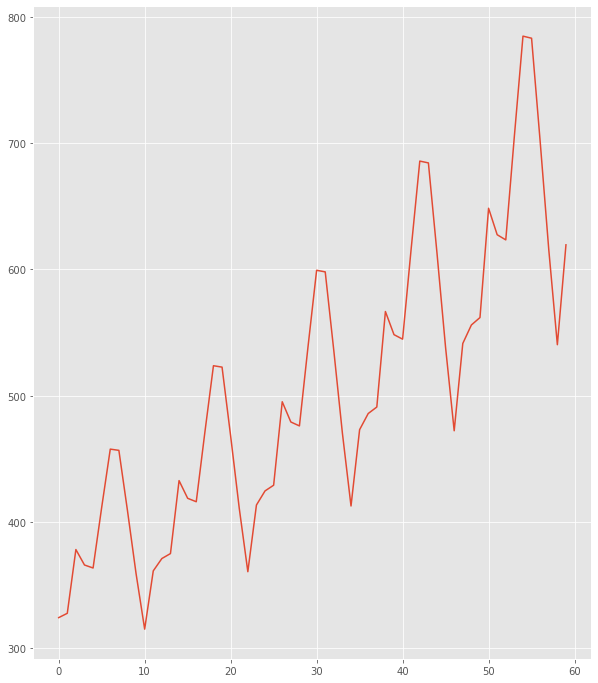

In [98]:
predict_data['Forecasted_Numbers'].plot()

#### Auto_Regression Model

In [99]:
full_res = airlines1.Passengers - model_full.predict(airlines1)
full_res

0     107.307037
1     113.296513
2     127.153334
3     124.186186
4     116.192709
         ...    
91    399.021661
92    349.131900
93    300.262011
94    265.392462
95    300.255915
Length: 96, dtype: float64

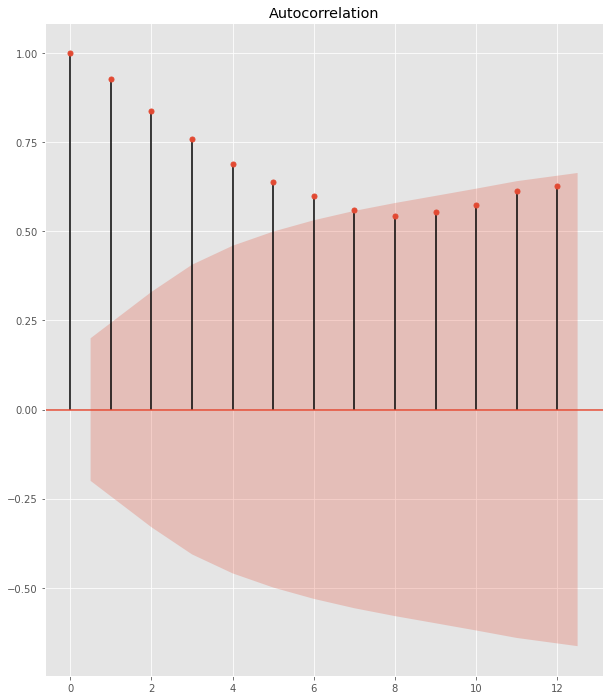

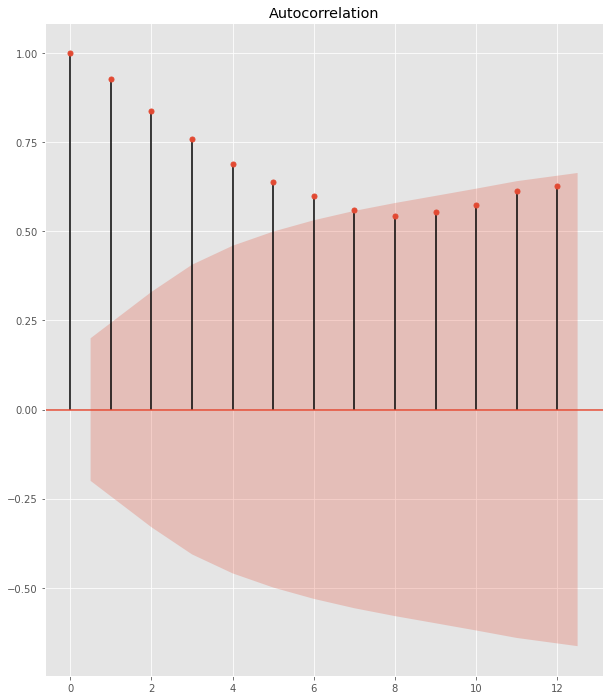

In [100]:
# ACF Plot on residuals

tsa_plots.plot_acf(full_res, lags=12)

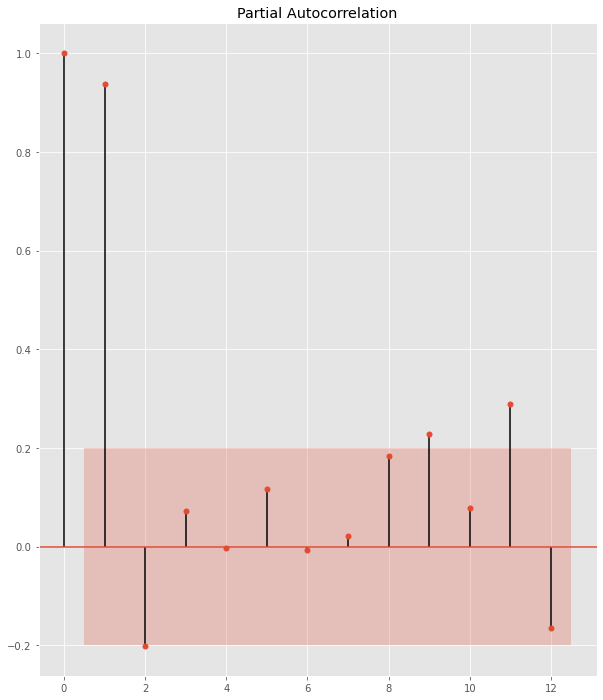

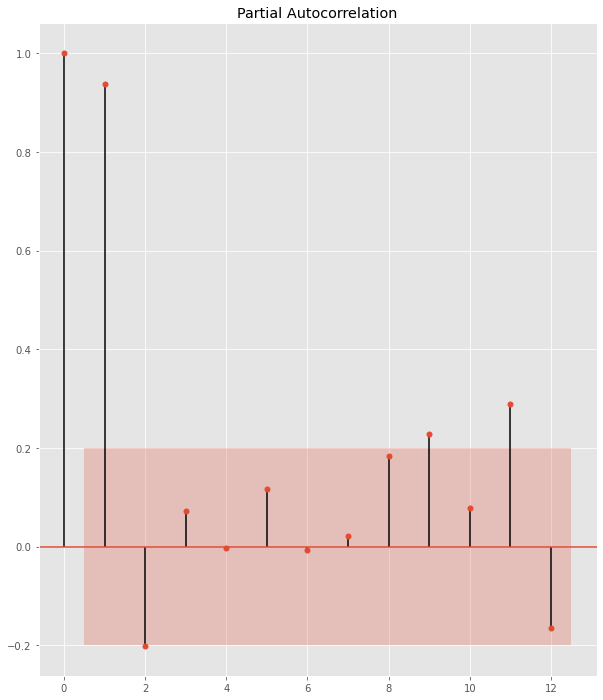

In [101]:
tsa_plots.plot_pacf(full_res, lags=12)

In [102]:
# AR model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])
# model_ar = AutoReg(Train_res, lags=12)
model_fit = model_ar.fit()

In [103]:
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    13.465404
y.L1          0.944877
dtype: float64


In [104]:
pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(predict_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)

In [107]:
# The Final Predictions using ASQT and AR(1) Model
final_pred = np.exp(pred_new) + pred_res
final_pred

0      621.571770
1      622.088350
2      669.798975
3      654.969833
4      650.130187
5      695.754496
6      739.705502
7      736.662750
8      687.019472
9      635.251223
10     589.568123
11     634.043753
12     642.249892
13     644.700597
14     701.049213
15     685.741653
16     681.772767
17     735.459324
18     787.149545
19     784.991317
20     729.438840
21     671.386000
22     620.230788
23     672.175553
24     682.561859
25     686.307737
26     751.672826
27     734.998363
28     731.251502
29     793.431420
30     853.285710
31     851.486378
32     788.555282
33     722.728314
34     664.760775
35     724.731234
36     737.120186
37     741.883198
38     817.125918
39     798.472419
40     794.587484
41     866.115179
42     934.960889
43     933.241429
44     861.555012
45     786.537401
46     720.496014
47     789.385979
48     803.817274
49     809.508719
50     895.831214
51     874.703103
52     870.461609
53     952.497600
54    1031.454196
55    1029

In [108]:
predict_data['Forecasted_Numbers_With_Residuals'] = pd.Series(final_pred)
predict_data

,Month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Forecasted_Numbers,Forecasted_Numbers_With_Residuals
0,2003-01-01,97,1,0,0,0,0,0,0,0,0,0,0,0,324.401579,621.571770
1,2003-02-01,98,0,1,0,0,0,0,0,0,0,0,0,0,327.833787,622.088350
2,2003-03-01,99,0,0,1,0,0,0,0,0,0,0,0,0,378.299321,669.798975
3,2003-04-01,100,0,0,0,1,0,0,0,0,0,0,0,0,366.073228,654.969833
4,2003-05-01,101,0,0,0,0,1,0,0,0,0,0,0,0,363.693142,650.130187
5,2003-06-01,102,0,0,0,0,0,1,0,0,0,0,0,0,411.641432,695.754496
6,2003-07-01,103,0,0,0,0,0,0,1,0,0,0,0,0,457.788313,739.705502
7,2003-08-01,104,0,0,0,0,0,0,0,1,0,0,0,0,456.820392,736.662750
8,2003-09-01,105,0,0,0,0,0,0,0,0,1,0,0,0,409.137573,687.019472
9,2003-10-01,106,0,0,0,0,0,0,0,0,0,1,0,0,359.221716,635.251223


We have sucessfully forecasted Airlines data using different models. We went with the model which had the least RMSE value